https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view? usp=sharing

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

By following these steps, you can develop a comprehensive understanding of decision tree modeling and
its applications to real-world healthcare problems. Good luck!

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.
## And
### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.


In [2]:
df = pd.read_csv('/Users/aakanksha/My_Codes/data-science-master-course/data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


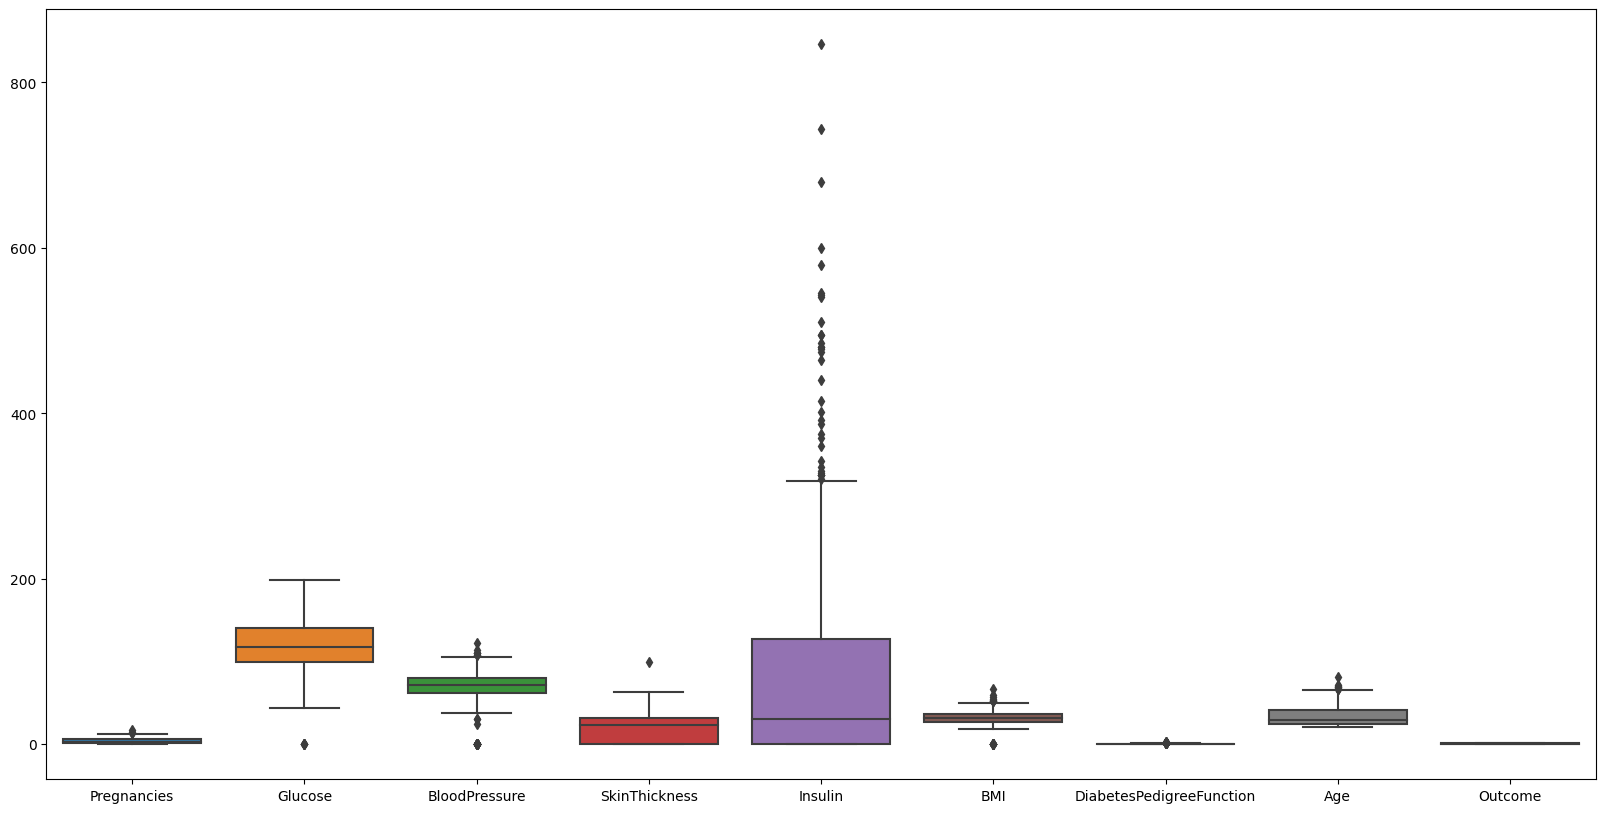

In [4]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()


### Observation 
 
1. blood pressure, glucose, Insulin, BMI cannot be zero. So we need to replace it with the mean or in some place with median if there are many outliers(as in the case of Insulin). 

2. in insulin column there are several outliers.

3. there are no categorical variables. Therefore we do not need to transform it into dummy variables. 

In [5]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean()) ## replacing null or 0 value with mean 
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean()) # replacing null or 0 value with mean 
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())# replacing null or 0 value with median as there are several outliers 
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean()) # replacing null or 0 value with mean 

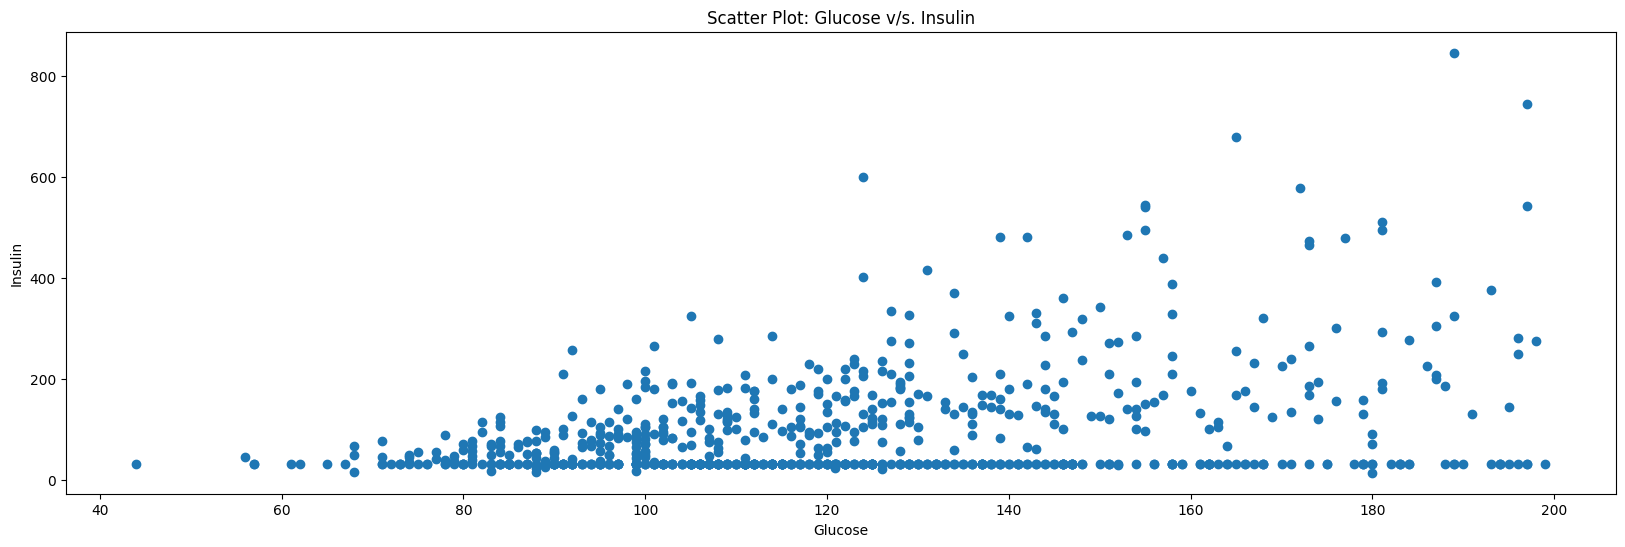

In [6]:
# Create a scatter plot to visualize the relationship between 'Glucose' and 'Insulin'
plt.figure(figsize=(20,6))
plt.scatter(df['Glucose'], df['Insulin'])
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Scatter Plot: Glucose v/s. Insulin')
plt.show()

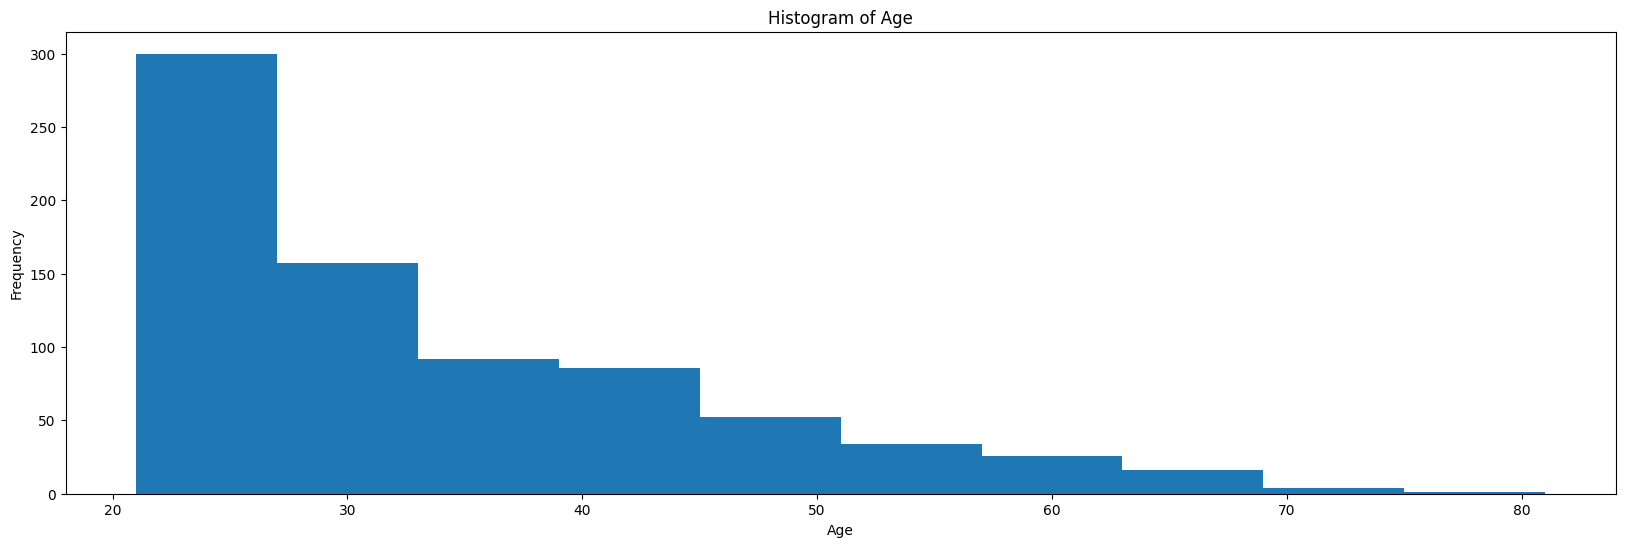

In [7]:
# Plot a histogram for the 'Age' variable
plt.figure(figsize=(20,6))
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

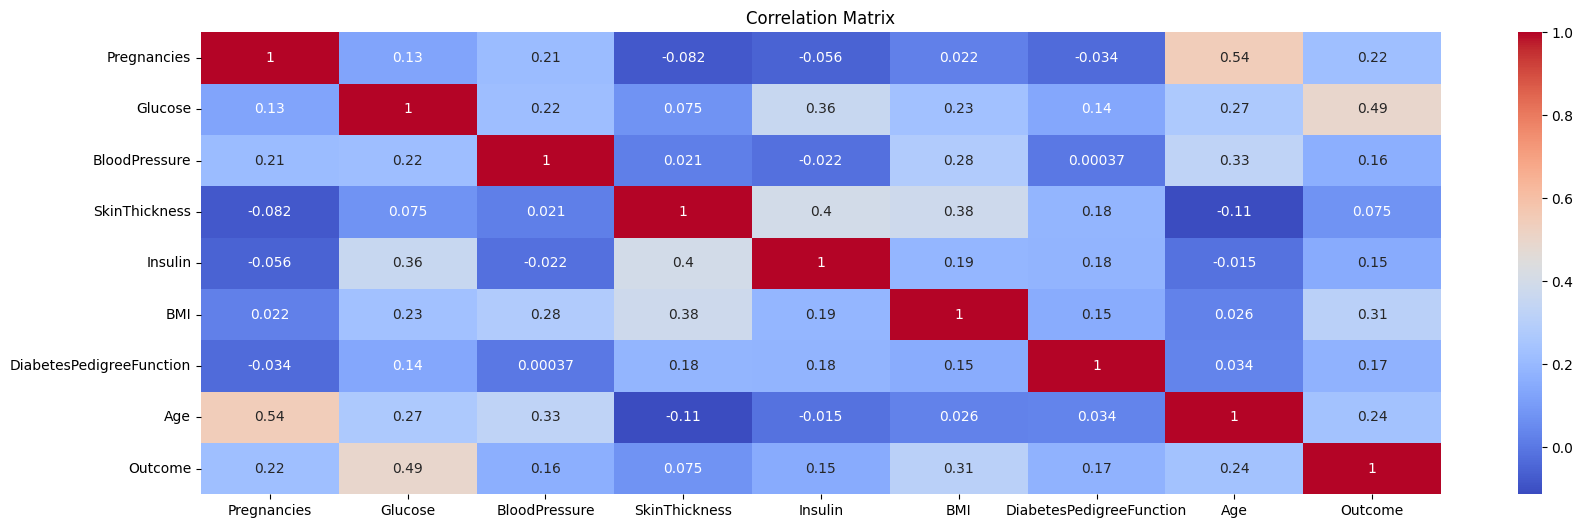

In [8]:
# Create a correlation matrix and heatmap to visualize the relationships between all variables
plt.figure(figsize=(20,6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.


In [9]:
X = df.iloc[:,:-1] 
y = df.iloc[:,-1] # separating input and output variable

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)


In [10]:
# Verify the shapes of the train and test datasets
print("Train dataset shape:", X_train.shape)
print("Test dataset shape:", X_test.shape)

Train dataset shape: (514, 8)
Test dataset shape: (254, 8)


### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [11]:
from sklearn.model_selection import GridSearchCV

# Define the decision tree regressor
classifier = DecisionTreeClassifier()


## Hyperparameter Tunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

# Perform grid search cross-validation
grid_search_cv = GridSearchCV(classifier, param_grid=parameter, cv=5, scoring='accuracy')
grid_search_cv.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search_cv.best_params_
best_model = grid_search_cv.best_estimator_
best_score = grid_search_cv.best_score_
print("best parameters", best_params)
print("best score", best_score)
print("best model", best_model)


best parameters {'criterion': 'log_loss', 'max_depth': 4, 'max_features': 'log2', 'splitter': 'best'}
best score 0.7529602132114982
best model DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2')


### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.


accuracy score:  0.6732283464566929
precision score:  0.5137614678899083
recall score:  0.6511627906976745
f1 score:  0.5743589743589744
classification report:                precision    recall  f1-score   support

           0       0.79      0.68      0.73       168
           1       0.51      0.65      0.57        86

    accuracy                           0.67       254
   macro avg       0.65      0.67      0.65       254
weighted avg       0.70      0.67      0.68       254

confusion_matrix
[[115  53]
 [ 30  56]]


Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC)')

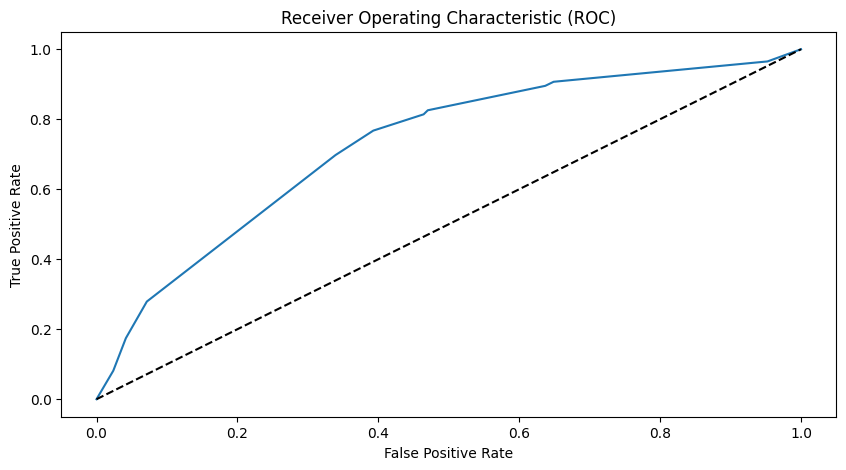

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred=classifier.predict(X_test)
acc_score=accuracy_score(y_test,y_pred)
pre_score=precision_score(y_test,y_pred)
rec_score=recall_score(y_test,y_pred)
F1_score=f1_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
print('accuracy score: ',acc_score)
print('precision score: ',pre_score)
print('recall score: ',rec_score)
print('f1 score: ',F1_score)
print('classification report: ',report)


# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix")
print(cm)

# Calculate ROC curve and AUC
y_scores = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

### Q.6 Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.


Feature Importances:
Glucose: 0.5999909124896133
Age: 0.23919376375424273
DiabetesPedigreeFunction: 0.09264590328861788
SkinThickness: 0.03652555197138554
Insulin: 0.031643868496140454
Pregnancies: 0.0
BloodPressure: 0.0
BMI: 0.0


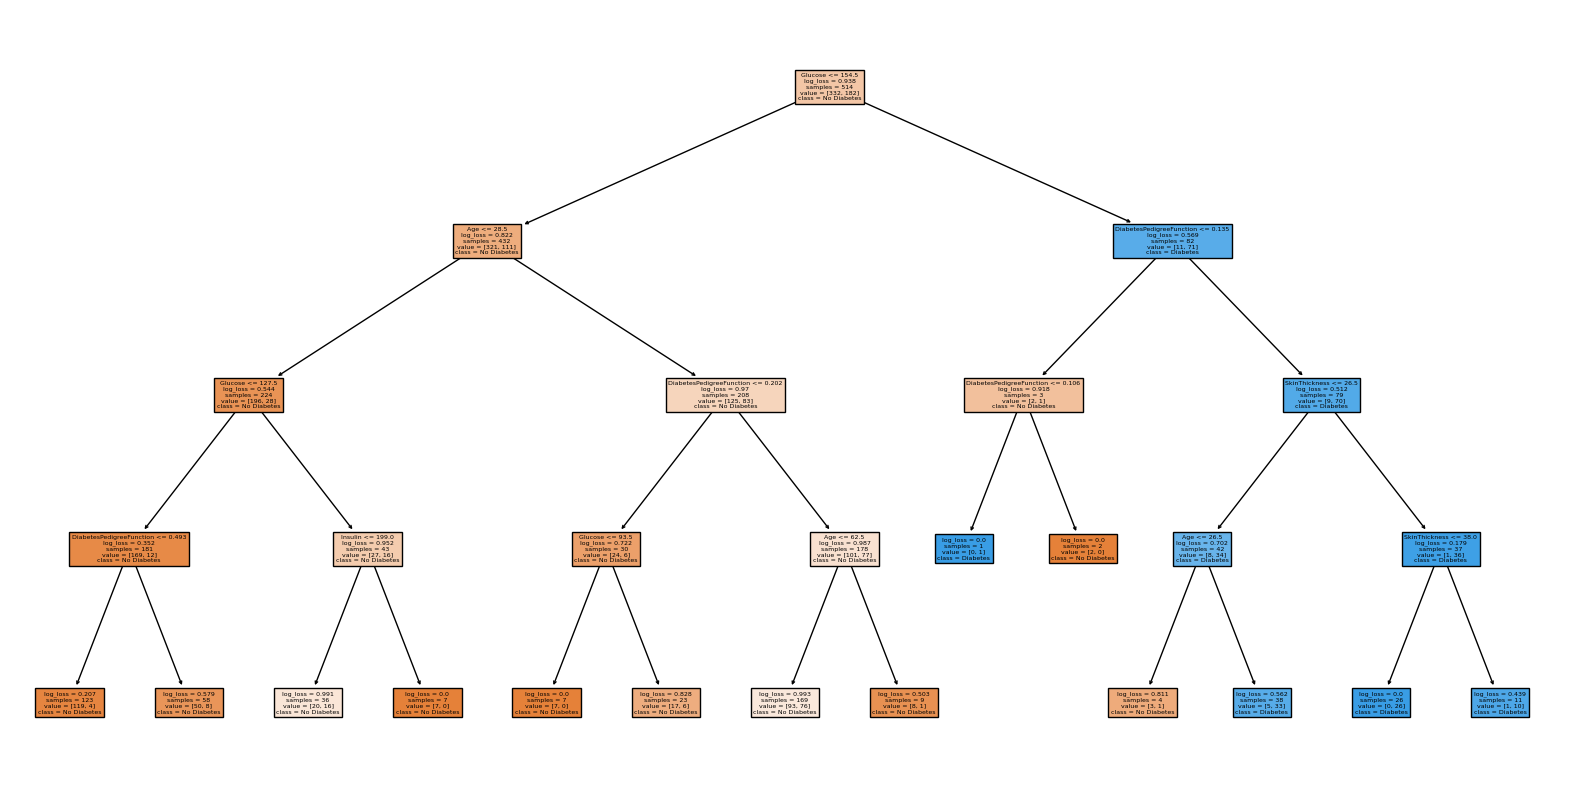

In [13]:
# Get the feature importances from the best model
feature_importances = best_model.feature_importances_

# Create a dictionary of feature names and their importances
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
print("Feature Importances:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

# Visualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, filled=True, class_names=["No Diabetes", "Diabetes"])
plt.show()


### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

1. Sensitivity Analysis: Sensitivity analysis helps understand how changes in input variables affect the output or predictions of the model. In the case of a decision tree model, you can conduct sensitivity analysis by varying the values of important features and observing the impact on the predicted outcomes. This analysis helps identify the sensitivity of the model to different input scenarios.

2. Scenario Testing: Scenario testing involves evaluating the model's performance under different hypothetical scenarios or conditions. You can create various scenarios by modifying the dataset or introducing specific changes to the environment. For example, you could simulate scenarios such as an increase in missing values, changes in the distribution of certain features, or the presence of outliers. By applying the decision tree model to these scenarios, you can assess its ability to adapt and make accurate predictions in different situations.

By applying sensitivity analysis and scenario testing, you can gain a deeper understanding of the decision tree model's performance, assess its robustness to different scenarios and changes, and explore uncertainties and risks associated with its predictions. These validation techniques help provide confidence in the model's reliability and enhance its applicability in practical settings.